In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

sys.path.append("../../") 

from wfslib.geometry import Geometry
from wfslib.wfs import WFSData


### Загружаем данные 

In [2]:
def read_bim(path):
    with open(path, "rb") as f:
        ny = int.from_bytes(f.read(4), "little")
        nx = int.from_bytes(f.read(4), "little")
        return np.frombuffer(f.read()).reshape(ny, nx)

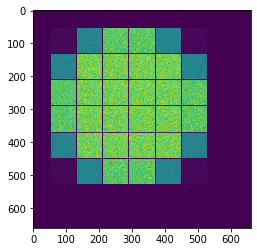

In [28]:
bim_img = read_bim("../data/bims/z=0.bim").copy()
bim_img2 = read_bim("../data/bims/z=4.bim").copy()
plt.imshow(bim_img)

../..\wfslib\wfs.py:137: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


{'border': 4.0, 'cell_width': 75.0, 'start_point': [212, 212]}


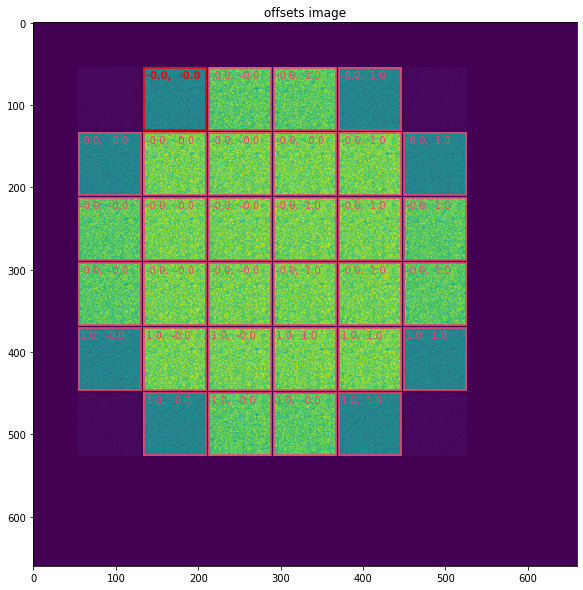

In [31]:
wfs1 = WFSData(bim_img)

p = wfs1.geometry.options
print(p)
wfs1.geometry.set_options(shift=(-3, -3),cell_width = 75)

wfs1.good_only = True
wfs1.reference = 0
#plt.imshow(arr[0])
wfs1.show_geometry(show_type = "offsets")


{'border': 4.0, 'cell_width': 75.0, 'start_point': [212, 212]}


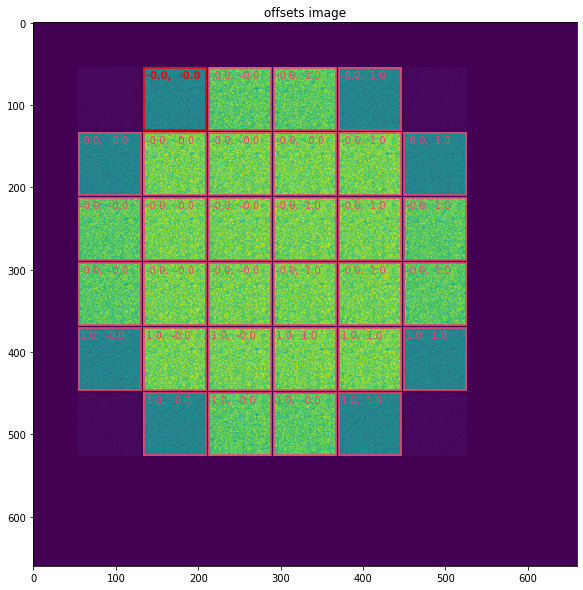

In [30]:
wfs2 = WFSData(bim_img2)

p = wfs2.geometry.options
print(p)
wfs2.geometry.set_options(shift=(-3, -3),cell_width = 75)

wfs2.good_only = True
wfs2.reference = 0
wfs1.show_geometry(show_type = "offsets")

### Считаем смещения (полное VS срез)

In [47]:
res = cv2.matchTemplate(wfs1[0][0].astype(np.float32),bim_img.astype(np.float32),0)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

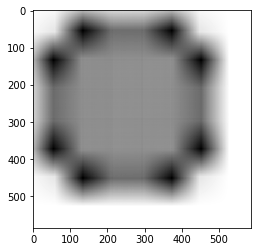

In [48]:
plt.imshow(res,cmap = 'gray')


### Считаем смещения (срез VS срез)

In [55]:
res = cv2.matchTemplate(wfs1[0][0].astype(np.float32), wfs2[0][0].astype(np.float32),0)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

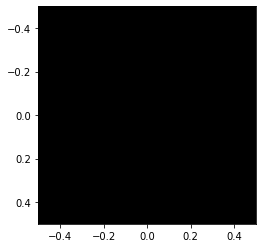

In [56]:
plt.imshow(res,cmap = 'gray')